# Effects of alcohol levels on subjective quality judgements of Vinho Verde wine

## Introduction

In my previous analysis (see [here](https://github.com/jklydev/everything-counts-summative-1/blob/main/wine.ipynb)) we saw that the main physicochemical feature that correlated with wine quality was alcohol levels, with wines that scored higher having higher alcohol levels on average. This might strike us as odd, given that the wines in the data set, Vinho Verde, are especially known for being less alcoholic on average, and are indeed enjoyed by many-- in the summer, during the daytime--  precisely for that quality. 

One possible explanation is that higher alcohol levels can mask negatively associated elements such as density and volatile acidity:

[The relevant and complex role of ethanol in the sensory properties of model wines](https://oeno-one.eu/article/view/7864)

[Perception of Aqueous Ethanol Binary Mixtures Containing Alcohol-Relevant Taste and Chemesthetic Stimuli](https://www.mdpi.com/2306-5710/7/2/23)

[SOURNESS–SWEETNESS INTERACTIONS IN DIFFERENT MEDIA: WHITE WINE, ETHANOL AND WATER](https://onlinelibrary.wiley.com/doi/10.1111/j.1745-459X.2006.00085.x)

A full analysis of these papers is beyond the scope of this exercise-- but in summary while they do show various ways alcohol levels can suppress or enhance certain taste components, they don't investigate or find results of the exact effects we're looking at here in the exact range we're looking at. As such I will attempt to see if their findings can be generalised to this data set, and if so, what that would mean for our interpretation of it.

## The Plan

Firstly I'm going to provide an abridged and focused version of the analysis from the previous notebook, in order to motivate this investigation. Then I'm going to do some novel investigation into the data in order to test my hypothesis. Finally, I'm going to discuss the results and what this means for our interpretation of the dataset.

I'm also going to focus on the white wines this time in order to simplify our investigation, as they make up the largest part of our dataset, and because they're what Vinho Verde is most known for.

## Initial Data Exploration

In [11]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from scipy import stats

In [ ]:
wine_quality_dataset = fetch_ucirepo(id=186) # This line may hang for a bit, it's a large data set

wine_quality_dataset.data.keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

Please see the previous notebook for a more thorough breakdown of how this dataset is structured. For our purposes however we just need to know that the entire combined dataset (features + targets) is stored under the `originals` key.

In [9]:
all_wines: pd.DataFrame = wine_quality_dataset.data.original
all_wines.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


And as mentioned before: we'll be focusing on the white wines, which make up the majority of the database.

In [ ]:
all_wines_by_color = all_wines.groupby("color")

white_wines = all_wines_by_color.get_group("white")

In [8]:
white_wines.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Quality Scores

First let's remind ourselves of how the quality scores are distributed.

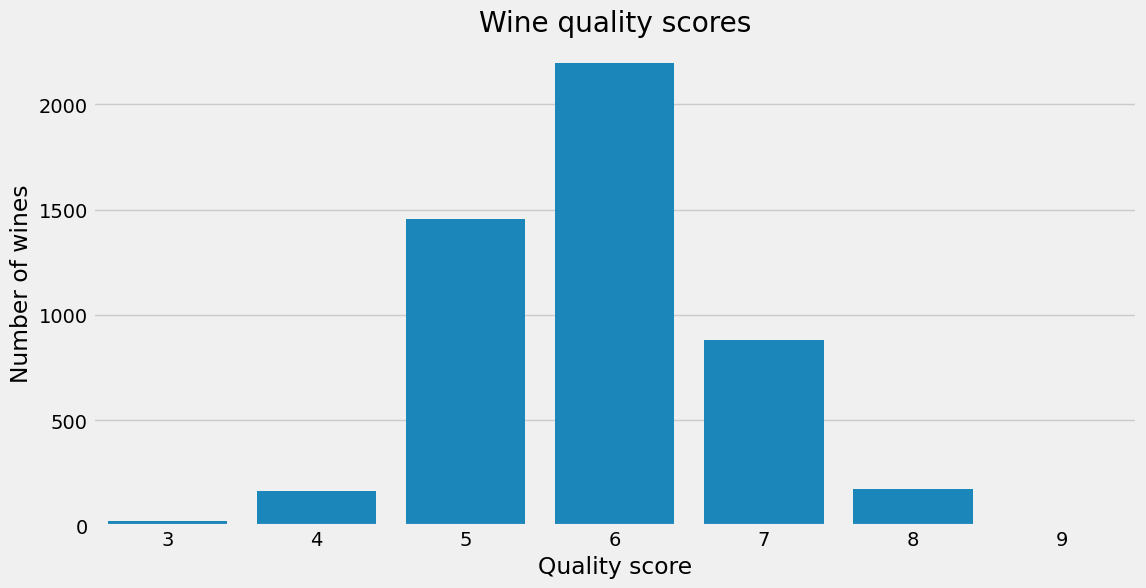

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

In [12]:
quality_counts = white_wines["quality"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.countplot(data=white_wines, x="quality")
plt.title("Wine quality scores")
plt.xlabel("Quality score")
plt.ylabel("Number of wines")
plt.show()

quality_counts

As we see it's highly concentrated, with ~93% of the dataset falling into just 3 of the quality buckets. This will be relevant to our analysis later.

In [7]:
bulk_percent = round(((quality_counts[5] + quality_counts[6] + quality_counts[7])/quality_counts.sum())*100, 2)

f'{bulk_percent}%'

'92.59%'

### Correlations

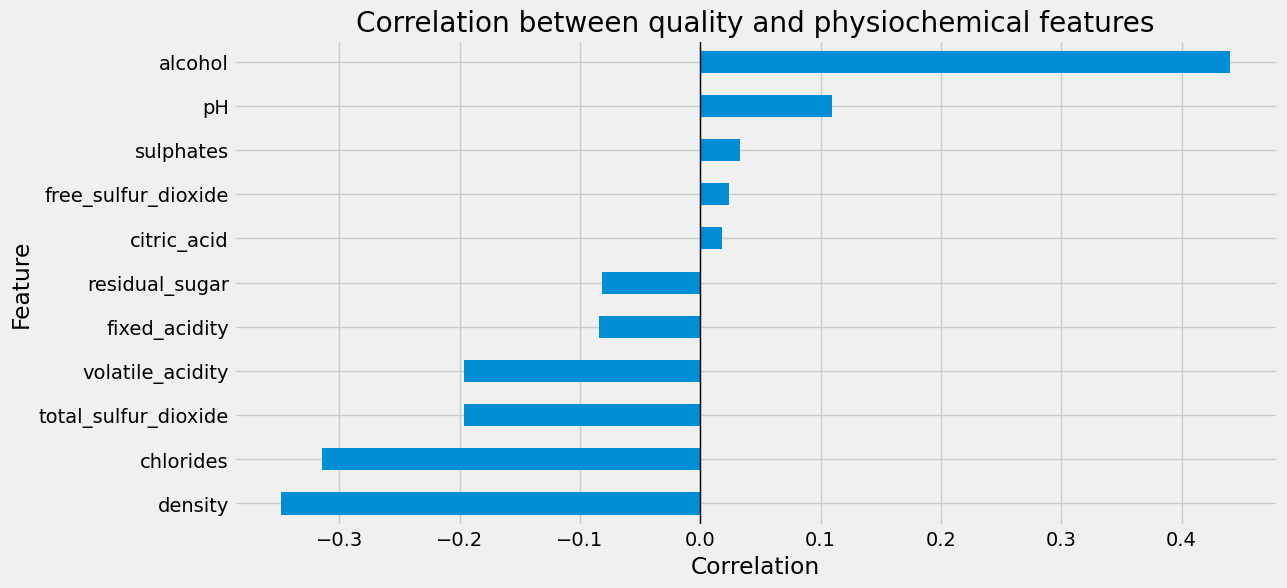

density                -0.348351
chlorides              -0.314488
total_sulfur_dioxide   -0.196680
volatile_acidity       -0.196562
fixed_acidity          -0.084485
residual_sugar         -0.082070
citric_acid             0.018333
free_sulfur_dioxide     0.023713
sulphates               0.033319
pH                      0.109362
alcohol                 0.440369
Name: quality, dtype: float64

In [ ]:
def get_correlations(wines: pd.DataFrame, corr="quality", method="spearman")-> pd.Series: # We'll be using this a lot so we'll make it a function
    return (wines.corr(
        numeric_only=True, # Drop color, basically
        method=method, # We default to spearman because quality is non-continuous
        )[corr] # Pull out only correlations with the feature we care about
    .drop(index=corr) # Drop the correlation with self
    .sort_values())

quality_correlations = get_correlations(white_wines, corr="quality")

plt.figure(figsize=(12, 6))
quality_correlations.plot(
    kind="barh"
)
plt.axvline(0, color="black", linewidth=1)
plt.title("Correlation between quality and physiochemical features")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

quality_correlations

As we see, only one thing has a major, positive correlation with quality: Alcohol percentage.

Let's look at the negative correlations now:

#### Density

First amongst the negative correlations is density-- which I think we can probably ignore. We see from the [original paper for which this dataset was created](https://www.semanticscholar.org/paper/Modeling-wine-preferences-by-data-mining-from-Cortez-Cerdeira/bf15a0ccc14ac1deb5cea570c870389c16be019c) (which I have not read, beyond the learning more about how various measurements work) that density is not a technical wine term but the literal concept of g/cm**3. Thus as alcohol is lighter than water we would expect this to be linearly correlated with alcohol.

Thus, since I am currently unaware of any theory that would allow density itself to drive this correlation, I'm choosing to treat this as a proxy measure for alcohol and dismiss it from my analysis. Density instead driving the relationship, and alcohol just being a proxy for it, would however be a valid alternative hypothesis worth investigating another time.

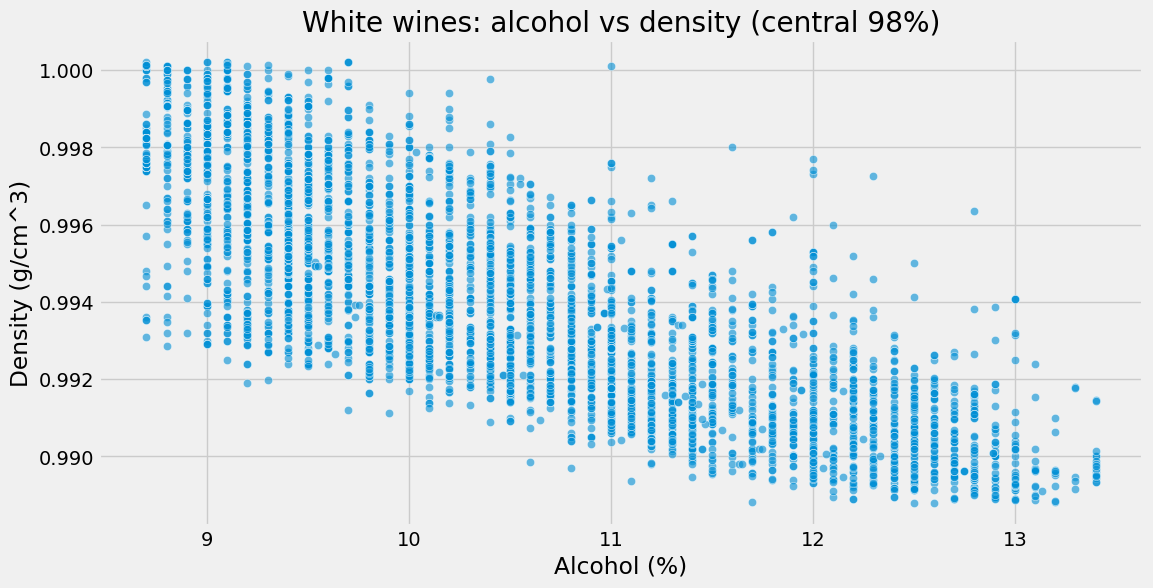

SignificanceResult(statistic=np.float64(-0.821855081526531), pvalue=np.float64(0.0))

In [ ]:
trim_pct = 0.01
alcohol_bounds = white_wines["alcohol"].quantile([trim_pct, 1 - trim_pct])
density_bounds = white_wines["density"].quantile([trim_pct, 1 - trim_pct])

white_wines_trimmed = white_wines[ # There is one extreme outlier which makes the graph look basically flat but doesn't otherwise affect the correlation.
    white_wines["alcohol"].between(alcohol_bounds.iloc[0], alcohol_bounds.iloc[1])
    & white_wines["density"].between(density_bounds.iloc[0], density_bounds.iloc[1])
]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=white_wines_trimmed, x="alcohol", y="density", alpha=0.6)
plt.title("White wines: alcohol vs density (central 98%)")
plt.xlabel("Alcohol (%)")
plt.ylabel("Density (g/cm^3)")
plt.show()

alc_dens_corr = stats.spearmanr(white_wines.alcohol, white_wines.density)
alc_dens_corr


#### Chlorates

Basically how salty the wine is-- measured as `g/dm**3`. There is also a valid and reasonable sounding hypothesis to test here: People don't like salty wine. However this is not what I'm going to focus on, for a few reasons.

Firstly, while research does conclude that higher levels of chlorates does reduce people's enjoyment of wine, it's also [been shown](https://www.ajevonline.org/content/65/1/124.short) that our threshold for being able to detect chlorates starts at around 0.57, meaning that it's not directly detectable in any of the wines in our sample. Instead it is likely subtly enhancing other factors, such as minerality. Which leads me to the second reason for not choosing this as my main area of investigation: chlorates, like minerality, are largely influenced by the soil in which they are grown, i.e. coastal soils will always score higher than inland soils. Thus I suspect that investigating this would mean disentangling it from a lot of other factors that were also influenced by coastal vs inland regions.

#### Volatile Acidity

Volatile Acidity, measured as `(g(acetic acid)/dm**3)` is basically how much acetic acid is in your wine, or to put it another way-- how far along is your wine on its journey to becoming vinegar. 

As mentioned in the introduction this is what I'm going to choose to focus my main investigation on. Firstly there's a clear theoretical and empirical basis for why this would be suppressed by alcohol, as the perception of other acids were suppressed at lower levels (see [here](https://oeno-one.eu/article/view/7864) and [here](https://www.mdpi.com/2306-5710/7/2/23)). Secondly, a lot of the factors that increase it beyond the typical range are influenced by poor winemaking practices, which means it's likely to be less associated with a given variety or location than other measures-- though this could still certainly be a confound.

## Investigating the relationship between Alcohol and Volatile Acidity

### Hypothesis

My hypothesis is thus: Higher alcohol content can inflate subjective wine ratings by masking chemical faults such as Volatile Acidity which would otherwise indicate a poor wine.

### Method

I'm going to investigate this in two parts. Firstly, before starting the hypothesis testing, I'm going to bucket the values into Low, Medium, and High qualities. As we saw, the data is very clustered so I think it makes more sense to analyse it like that. Once I have the buckets I'll start the investigation.

Firstly I'm going to compare all three tiers against each other using a one-way ANOVA, with the dependent variable being alcohol and the independent being the quality tier. This will establish that alcohol isn't just a correlation but that we can say it likely has a causal relationship on quality.

Secondly, I'm going to run an independent samples T-Test on just the medium and high tiers, with the dependent variable as Volatile Acidity. To test if high quality wines actually have a meaningfully lower Volatile Acidity than mediums.

Thirdly, I'm going to repeat step two with both Chlorides, and Total Sulphur Dioxide. As if they're higher in medium than they are in high then that would show alcohol was unlikely to be masking them, and they were being evaluated fairly.

If we show that a. there is a significant difference in alcohol, b. that there is minimal difference in VAs, and c. that VAs are the only major correlate that doesn't differ, then we have found evidence for the "masking effect" hypothesis.

We want to drop the low tier in all of our subsiquent tests as I simplay don't think it will add much beyond complexity. Firstly we can see from the description that some of the VA values are getting close to the cutoff for what would even get sold, values I highly doubt any quanity of alcohol would mask. And in the previous exploration we saw how the lower ranks had much higher variance for many negative corrilates, broadly I expect them to fail in a variety of ways in addition to VA that would make our analysis less useful.

Medium teirs on the other hand are likely to have reasonable, if worse values, making it a more useful comparison.

So all in all, for once in my life, I'll be leaving the cheap wine alone.

![alt text](https://img.gifglobe.com/grabs/blackbooks/S02E05/gif/E0nqUjhLU7VE.gif)

### Conducting the Investigation

#### Creating the tiers

Firstly we split the wines into tiers. Everything below a 6 goes into low, everything above goes into high, and 6 goes into the medium bucket. This is a little clumsy, if we had decimal values we could be more accurate, but as it stands our hand is forced-- 6 is the most common ranking by far and is the medium and modal value, with the mean being only slightly lower at ~5.8. To group it in with any other rankings would mean having one tier that utterly dwarfs the other two. As it stands, the medium tier is still larger than the others, but not to an unreasonable degree.

In [29]:
quality_buckets = white_wines.groupby('quality')

low_quality = white_wines[white_wines['quality'].isin([3, 4, 5])]
medium_quality = white_wines[white_wines['quality'] == 6]
high_quality = white_wines[white_wines['quality'].isin([7, 8, 9])]


In [24]:
low_quality.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000
mean,6.961524,0.310265,0.334311,7.054451,0.051436,35.338720,148.597866,0.995160,3.170457,0.481506,9.849530,4.876220
std,0.884887,0.112548,0.142987,5.283594,0.026743,20.217828,46.914579,0.002556,0.144274,0.100566,0.876269,0.364596
min,4.200000,0.100000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987220,2.790000,0.250000,8.000000,3.000000
25%,6.400000,0.240000,0.240000,1.700000,0.040000,20.000000,117.000000,0.993200,3.080000,0.410000,9.200000,5.000000
50%,6.800000,0.290000,0.320000,6.625000,0.047000,34.000000,149.000000,0.995140,3.160000,0.470000,9.600000,5.000000
75%,7.500000,0.350000,0.410000,11.025000,0.053000,49.000000,182.000000,0.997100,3.240000,0.530000,10.400000,5.000000
max,11.800000,1.100000,1.000000,23.500000,0.346000,289.000000,440.000000,1.002410,3.790000,0.880000,13.600000,5.000000


In [25]:
medium_quality.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.0
mean,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372,6.0
std,0.837442,0.088142,0.119325,5.166625,0.020453,15.735679,41.286220,0.003024,0.150996,0.113357,1.147776,0.0
min,3.800000,0.080000,0.000000,0.700000,0.015000,3.000000,18.000000,0.987580,2.720000,0.230000,8.500000,6.0
25%,6.300000,0.200000,0.270000,1.700000,0.036000,24.000000,107.250000,0.991700,3.080000,0.410000,9.600000,6.0
50%,6.800000,0.250000,0.320000,5.300000,0.043000,34.000000,132.000000,0.993660,3.180000,0.480000,10.500000,6.0
75%,7.300000,0.300000,0.380000,9.900000,0.049000,46.000000,164.000000,0.995870,3.280000,0.550000,11.400000,6.0
max,14.200000,0.965000,1.660000,65.800000,0.255000,112.000000,294.000000,1.038980,3.810000,1.060000,14.000000,6.0


In [26]:
high_quality.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000
mean,6.725142,0.265349,0.326057,5.261509,0.038160,34.550472,125.245283,0.992412,3.215132,0.500142,11.416022,7.174528
std,0.768798,0.094097,0.080288,4.290845,0.011145,13.797146,32.724848,0.002772,0.157185,0.133044,1.255209,0.391978
min,3.900000,0.080000,0.010000,0.800000,0.012000,5.000000,34.000000,0.987110,2.840000,0.220000,8.500000,7.000000
25%,6.200000,0.190000,0.280000,1.800000,0.031000,25.000000,101.000000,0.990500,3.100000,0.400000,10.700000,7.000000
50%,6.700000,0.250000,0.310000,3.875000,0.037000,33.000000,122.000000,0.991730,3.200000,0.480000,11.500000,7.000000
75%,7.200000,0.320000,0.360000,7.400000,0.044000,42.000000,146.000000,0.993605,3.320000,0.580000,12.400000,7.000000
max,9.200000,0.760000,0.740000,19.250000,0.135000,108.000000,229.000000,1.000600,3.820000,1.080000,14.200000,9.000000


#### Running the Tests

So now that we have our tiers we can run our statistical tests. First is the ANOVA.

In [27]:
anova_result = stats.f_oneway(
    low_quality['alcohol'],
    medium_quality['alcohol'],
    high_quality['alcohol']
)
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"p-value: {anova_result.pvalue:.4g}")


F-statistic: 670.5278
p-value: 4.242e-258


This is robust. But while ANOVA is generally a fine choice for populations of different sizes, a better choice for imbalanced, non-normal groups would be Kruskal-Wallis-- it does better at these groups because it uses ranks rather than mangitues in order to assess population differences, factoring our diverse variances.

In [32]:

k_stat, p_val = stats.kruskal(
    low_quality['alcohol'],
    medium_quality['alcohol'],
    high_quality['alcohol']
)

print(f"K Statistic: {k_stat}")
print(f"P Value: {p_val}")

K Statistic: 989.9731834267867
P Value: 1.0716540331896809e-215


This confirms the previous test and it's a strong result, we can confidently reject the null hypothesis that there's no difference in alcohol level between the tiers.

In [ ]:
t_stat, p_val = stats.ttest_ind(
    medium_quality['volatile_acidity'],
    high_quality['volatile_acidity'],
    equal_var=False # Setting this to False causes it to use Welch's T test, which handles the unequal sample size issue we mentioned before
)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4g}")


t-statistic: -1.3878
p-value: 0.1654


And we are unable to strongly establish that the level of Volatile Acidity differs significantly between the two groups.

While this is suggestive, we still need to check that we don't see the same effect in Chlorides or Total Sulfur Dioxide, as if those are also the same it suggests that either there's a greater masking effect than suggested, or something else entirely happening.

In [ ]:
t_stat, p_val = stats.ttest_ind(
    medium_quality['chlorides'],
    high_quality['chlorides'],
    equal_var=False
)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4g}")


t-statistic: 12.7263
p-value: 3.126e-36


In [31]:
t_stat, p_val = stats.ttest_ind(
    medium_quality['total_sulfur_dioxide'],
    high_quality['total_sulfur_dioxide'],
    equal_var=False
)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4g}")

t-statistic: 8.8316
p-value: 1.867e-18


## Conclusion

So this would seem to provide promising evidence for our hypothesis. Alcohol does in fact differ significantly between groups, but Volatile Acidity doesn't. While two other major negative correlates do. And while it is strongly suggestive I don't think it's entirely persuasive. As we see alcohol has a very strong effect on its own, as you would imagine for a drink in the category of "Alcoholic Drinks", and it's hard to dismiss the idea-- even with a dataset of this size-- that it's having a huge effect on its own above and beyond any masking effect.

Also we have a potentially greater error, that we're assuming all of these variables are independent. I strongly suspect some of them are related, simply due to both being impacted by fermenting conditions, winery standards and practices, and simple chemical feedback loops. In fact we know that Alcohol is related to Volatile Acidity, due to the process of creating acetic acid depending on the presence of ethanol. I don't think this would be a major factor given the very low levels of acetic acid in even the higher VA samples, but it still makes things more complicated for us, and harder to form confident conclusions.